SyntaxError: invalid syntax (3325802001.py, line 1)

In [1]:
import pandas as pd

# Cargar el archivo
df_g = pd.read_csv('test_accuracy_log.csv')

df_g.head(50)


,experiment,test_accuracy
0,vgg16_5e-05_12,0.848754
1,vgg16_5e-05_8,0.820285
2,vgg16_5e-05_10,0.838078
3,vgg16_0.0001_10,0.882562
4,vgg16_0.001_10,0.941281
5,vgg16_0.001_12,0.946619
6,vgg16_0.001_8,0.941281
7,vgg16_0.0001_12,0.879004
8,vgg16_0.0001_8,0.870107
9,restnet50_5e-05_10,0.971530


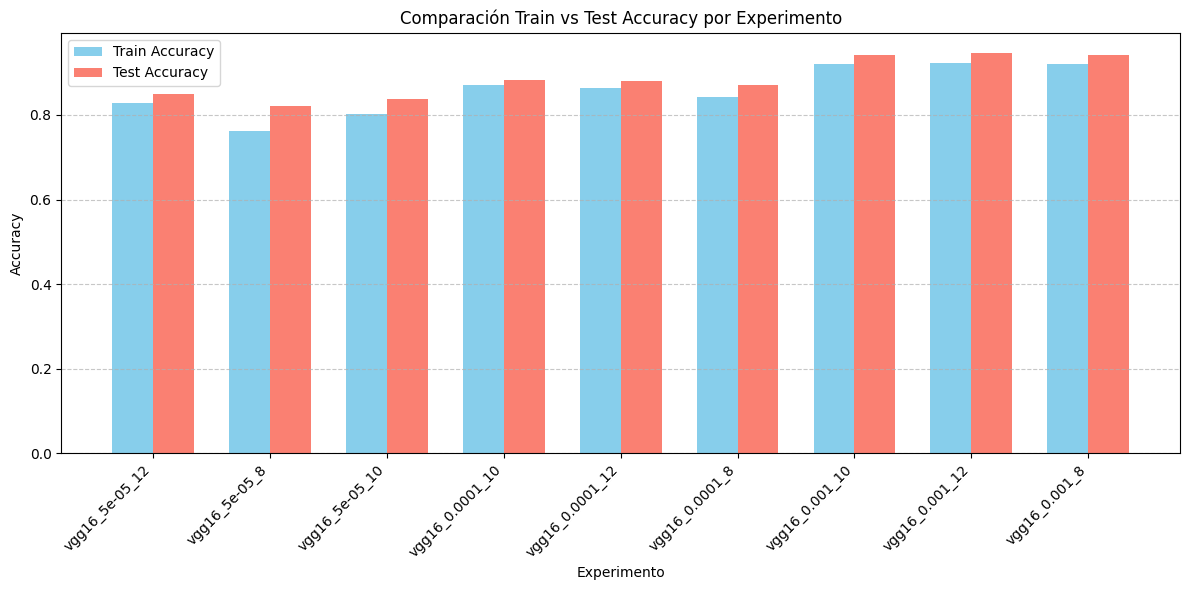

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Limpiar nombres de columnas si es necesario
df_g.columns = df_g.columns.str.strip()
df_a.columns = df_a.columns.str.strip()

# Tomar la última fila de cada experimento del entrenamiento
accuracy_final = df_g.groupby('experiment').tail(1)[['experiment', 'accuracy']]

# Combinar con los datos del test_accuracy
df_comparado = pd.merge(accuracy_final, df_a[['experiment', 'test_accuracy']], on='experiment')

# Gráfico de barras comparando ambos
x = df_comparado['experiment']
width = 0.35
x_pos = range(len(x))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, df_comparado['accuracy'], width=width, label='Train Accuracy', color='skyblue')
plt.bar([p + width for p in x_pos], df_comparado['test_accuracy'], width=width, label='Test Accuracy', color='salmon')

plt.xlabel('Experimento')
plt.ylabel('Accuracy')
plt.title('Comparación Train vs Test Accuracy por Experimento')
plt.xticks([p + width/2 for p in x_pos], x, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


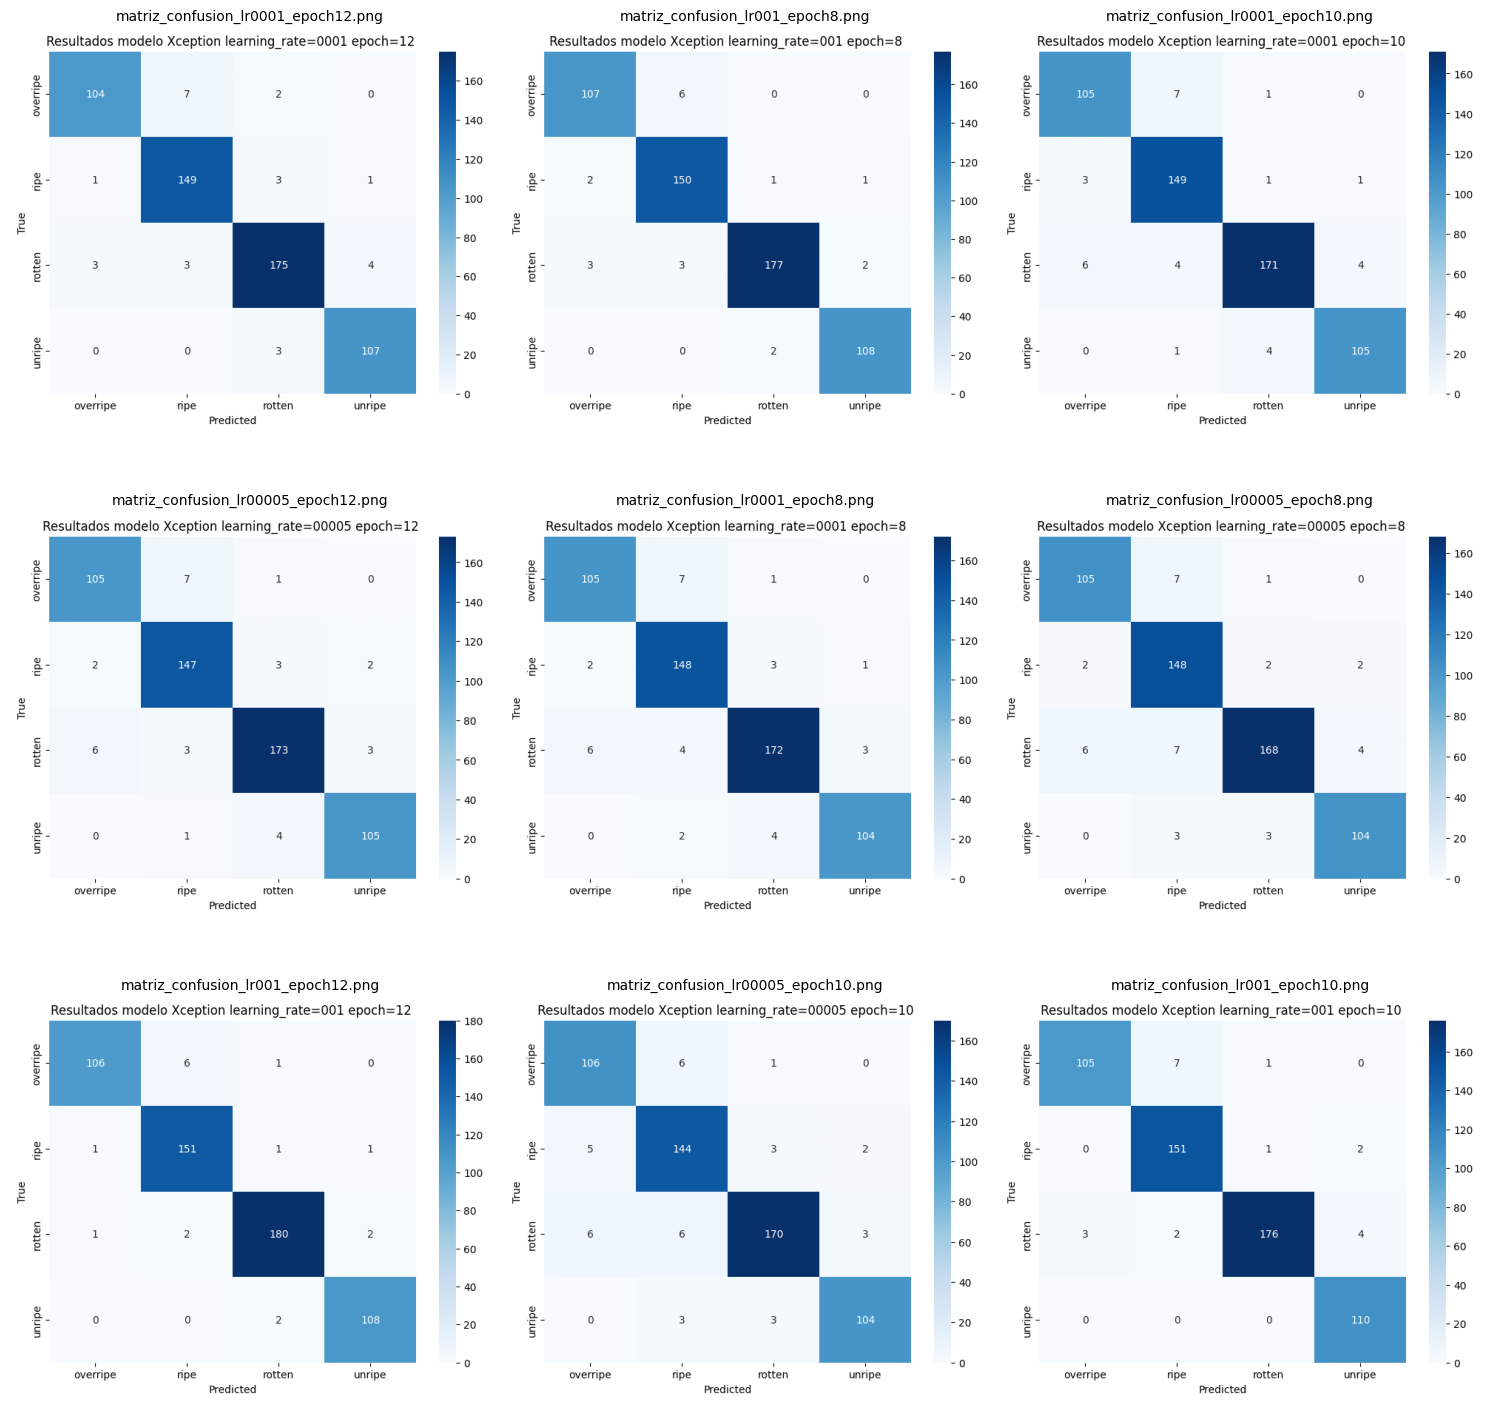

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# Ruta a la carpeta donde están las imágenes
folder_path = 'Matrices de confusion/XCEPTION'

# Lista de archivos de imagen (puedes filtrar si son PNG, JPG, etc.)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Total de imágenes
num_images = len(image_files)

# Definir número de columnas y calcular filas necesarias
cols = 3  # Puedes ajustar según tu preferencia
rows = math.ceil(num_images / cols)

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Para poder iterar fácilmente

# Cargar y mostrar cada imagen
for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(image_file, fontsize=10)
    axes[i].axis('off')

# Desactivar los subplots vacíos (si sobran)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar datos
df = pd.read_csv("resultados_modelos.csv")

# Asegurarse de que epoch sea numérico
df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce')

# Tomar la última época de cada experimento
ultimos = df.sort_values(by=['experiment', 'epoch']).groupby('experiment').tail(1).copy()

# Lista de métricas
metricas_directas = ['accuracy', 'val_accuracy', 'recall', 'f1_score', 'mcc']
metricas_invertidas = ['loss', 'val_loss']  # Menor es mejor
todas_metricas = metricas_directas + metricas_invertidas

# Normalizar todas
scaler = MinMaxScaler()
ultimos[todas_metricas] = scaler.fit_transform(ultimos[todas_metricas])

# Invertir métricas de pérdida
for col in metricas_invertidas:
    ultimos[col] = 1 - ultimos[col]

# Score compuesto: promedio de todas
ultimos['score'] = ultimos[todas_metricas].mean(axis=1)

# Mostrar el mejor por familia
familias = ['xception', 'vgg16', 'resnet50']

for familia in familias:
    mejor = ultimos[ultimos['experiment'].str.contains(familia, case=False, na=False)] \
                    .sort_values(by='score', ascending=False) \
                    .head(1)

    print(f"\n⭐ Mejor experimento para {familia.upper()}:")
    print(mejor[['experiment', 'score'] + todas_metricas])



⭐ Mejor experimento para XCEPTION:
            experiment     score  accuracy  val_accuracy   recall  f1_score  \
171  xception_0.001_12  0.797842  0.834839      0.757576  0.66502  0.761844   

          mcc      loss  val_loss  
171  0.756115  0.882384  0.927117  

⭐ Mejor experimento para VGG16:
         experiment     score  accuracy  val_accuracy    recall  f1_score  \
261  vgg16_0.001_12  0.832304  0.832258      0.848485  0.785632  0.859439   

          mcc      loss  val_loss  
261  0.846604  0.897189   0.75652  

⭐ Mejor experimento para RESNET50:
           experiment    score  accuracy  val_accuracy  recall  f1_score  mcc  \
81  resnet50_0.001_12  0.96521  0.904517           1.0     1.0       1.0  1.0   

        loss  val_loss  
81  0.905932  0.946022  


In [1]:
import pandas as pd
import numpy as np

# Cargar los datos
resultados_modelos = pd.read_csv('resultados_modelos.csv')
test_accuracy_log = pd.read_csv('test_accuracy_log.csv')

print("Datos cargados:")
print(f"resultados_modelos shape: {resultados_modelos.shape}")
print(f"test_accuracy_log shape: {test_accuracy_log.shape}")
print("\nColumnas en resultados_modelos:", resultados_modelos.columns.tolist())
print("Columnas en test_accuracy_log:", test_accuracy_log.columns.tolist())

# Filtrar por las tres estructuras: xception, vgg16, resnet50
estructuras = ['xception', 'vgg16', 'resnet50']

# Asumo que hay una columna que identifica el modelo/experimento (puede ser 'model', 'experiment', etc.)
# Ajusta el nombre de la columna según tu CSV
modelo_col = 'experiment'  # Cambia esto por el nombre real de tu columna

filtered_data = []
for estructura in estructuras:
    # Filtrar filas que contengan la palabra de la estructura (no exacta)
    mask = resultados_modelos[modelo_col].str.contains(estructura, case=False, na=False)
    filtered_data.append(resultados_modelos[mask].copy())

# Combinar todos los datos filtrados
datos_filtrados = pd.concat(filtered_data, ignore_index=True)

print(f"\nDatos filtrados: {datos_filtrados.shape[0]} experimentos")
print("Experimentos encontrados:")
for exp in datos_filtrados[modelo_col].unique():
    print(f"  - {exp}")

# Relacionar con test_accuracy_log
# Merge por nombre de experimento
datos_completos = pd.merge(datos_filtrados, test_accuracy_log, 
                          left_on=modelo_col, right_on='experiment', 
                          how='left')

print(f"\nDatos después del merge: {datos_completos.shape[0]} filas")

# Métricas para el scoring (ajusta según las columnas reales de tu CSV)
metricas_positivas = ['val_accuracy', 'recall', 'f1_score', 'mcc', 'test_accuracy']
metricas_negativas = ['val_loss']  # Estas se invierten (menor es mejor)

# Calcular score total para cada experimento
def calcular_score(row):
    score = 0
    
    # Sumar métricas positivas (mayor es mejor)
    for metrica in metricas_positivas:
        if metrica in row and pd.notna(row[metrica]):
            score += float(row[metrica])
    
    # Restar métricas negativas (menor es mejor, por eso las invertimos)
    for metrica in metricas_negativas:
        if metrica in row and pd.notna(row[metrica]):
            # Invertir la métrica: 1 - valor normalizado
            score += (1 - float(row[metrica]))
    
    return score

# Aplicar el cálculo de score
datos_completos['score_total'] = datos_completos.apply(calcular_score, axis=1)

# Identificar la estructura de cada experimento
def identificar_estructura(nombre_exp):
    nombre_lower = str(nombre_exp).lower()
    for estructura in estructuras:
        if estructura in nombre_lower:
            return estructura
    return 'desconocida'

datos_completos['estructura'] = datos_completos[modelo_col].apply(identificar_estructura)

# Encontrar el mejor modelo por estructura
mejores_modelos = {}

print("\n" + "="*80)
print("ANÁLISIS DE MEJORES MODELOS POR ESTRUCTURA")
print("="*80)

for estructura in estructuras:
    datos_estructura = datos_completos[datos_completos['estructura'] == estructura]
    
    if len(datos_estructura) == 0:
        print(f"\n❌ No se encontraron datos para {estructura.upper()}")
        continue
    
    # Encontrar el mejor modelo (mayor score)
    mejor_idx = datos_estructura['score_total'].idxmax()
    mejor_modelo = datos_completos.loc[mejor_idx]
    mejores_modelos[estructura] = mejor_modelo
    
    print(f"\n🏆 MEJOR MODELO - {estructura.upper()}")
    print("-" * 50)
    print(f"Experimento: {mejor_modelo[modelo_col]}")
    print(f"Score Total: {mejor_modelo['score_total']:.4f}")
    
    print("\n📊 MÉTRICAS DETALLADAS:")
    
    # Mostrar métricas positivas
    print("  Métricas de rendimiento (mayor es mejor):")
    for metrica in metricas_positivas:
        if metrica in mejor_modelo and pd.notna(mejor_modelo[metrica]):
            valor = float(mejor_modelo[metrica])
            print(f"    • {metrica}: {valor:.4f}")
    
    # Mostrar métricas negativas
    print("  Métricas de error (menor es mejor):")
    for metrica in metricas_negativas:
        if metrica in mejor_modelo and pd.notna(mejor_modelo[metrica]):
            valor = float(mejor_modelo[metrica])
            print(f"    • {metrica}: {valor:.4f}")
    
    # Mostrar otras métricas si existen
    otras_metricas = ['epoch_time']
    print("  Otras métricas:")
    for metrica in otras_metricas:
        if metrica in mejor_modelo and pd.notna(mejor_modelo[metrica]):
            valor = float(mejor_modelo[metrica])
            print(f"    • {metrica}: {valor:.2f}")

# Comparación final
print("\n" + "="*80)
print("COMPARACIÓN FINAL - RANKING GENERAL")
print("="*80)

ranking = []
for estructura, modelo in mejores_modelos.items():
    ranking.append({
        'estructura': estructura.upper(),
        'experimento': modelo[modelo_col],
        'score': modelo['score_total'],
        'val_accuracy': modelo.get('val_accuracy', 'N/A'),
        'test_accuracy': modelo.get('test_accuracy', 'N/A'),
        'val_loss': modelo.get('val_loss', 'N/A'),
        'f1_score': modelo.get('f1_score', 'N/A')
    })

# Ordenar por score descendente
ranking.sort(key=lambda x: x['score'], reverse=True)

print("\nRanking de mejores modelos:")
for i, modelo in enumerate(ranking, 1):
    print(f"\n{i}. {modelo['estructura']}")
    print(f"   Experimento: {modelo['experimento']}")
    print(f"   Score Total: {modelo['score']:.4f}")
    print(f"   Val Accuracy: {modelo['val_accuracy']}")
    print(f"   Test Accuracy: {modelo['test_accuracy']}")
    print(f"   Val Loss: {modelo['val_loss']}")
    print(f"   F1 Score: {modelo['f1_score']}")

# Resumen estadístico por estructura
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO POR ESTRUCTURA")
print("="*80)

for estructura in estructuras:
    datos_estructura = datos_completos[datos_completos['estructura'] == estructura]
    
    if len(datos_estructura) == 0:
        continue
        
    print(f"\n📈 {estructura.upper()}:")
    print(f"   Número de experimentos: {len(datos_estructura)}")
    print(f"   Score promedio: {datos_estructura['score_total'].mean():.4f}")
    print(f"   Score máximo: {datos_estructura['score_total'].max():.4f}")
    print(f"   Score mínimo: {datos_estructura['score_total'].min():.4f}")
    
    if 'val_accuracy' in datos_estructura.columns:
        print(f"   Val Accuracy promedio: {datos_estructura['val_accuracy'].mean():.4f}")
    if 'test_accuracy' in datos_estructura.columns:
        print(f"   Test Accuracy promedio: {datos_estructura['test_accuracy'].mean():.4f}")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)

Datos cargados:
resultados_modelos shape: (270, 10)
test_accuracy_log shape: (27, 2)

Columnas en resultados_modelos: ['experiment', 'epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss', 'recall', 'f1_score', 'mcc', 'epoch_time']
Columnas en test_accuracy_log: ['experiment', 'test_accuracy']

Datos filtrados: 270 experimentos
Experimentos encontrados:
  - xception_5e-05_10
  - xception_5e-05_12
  - xception_5e-05_8
  - xception_0.0001_10
  - xception_0.0001_12
  - xception_0.0001_8
  - xception_0.001_10
  - xception_0.001_12
  - xception_0.001_8
  - vgg16_5e-05_10
  - vgg16_5e-05_12
  - vgg16_5e-05_8
  - vgg16_0.0001_10
  - vgg16_0.0001_12
  - vgg16_0.0001_8
  - vgg16_0.001_10
  - vgg16_0.001_12
  - vgg16_0.001_8
  - resnet50_5e-05_10
  - resnet50_5e-05_12
  - resnet50_5e-05_8
  - resnet50_0.0001_10
  - resnet50_0.0001_12
  - resnet50_0.0001_8
  - resnet50_0.001_10
  - resnet50_0.001_12
  - resnet50_0.001_8

Datos después del merge: 270 filas

ANÁLISIS DE MEJORES MODELOS POR ESTRUCT

In [2]:
import pandas as pd
import numpy as np

# Cargar los datos
resultados_modelos = pd.read_csv('resultados_modelos.csv')
test_accuracy_log = pd.read_csv('test_accuracy_log.csv')

print("Datos cargados:")
print(f"resultados_modelos shape: {resultados_modelos.shape}")
print(f"test_accuracy_log shape: {test_accuracy_log.shape}")
print("\nColumnas en resultados_modelos:", resultados_modelos.columns.tolist())
print("Columnas en test_accuracy_log:", test_accuracy_log.columns.tolist())

# Filtrar por las tres estructuras: xception, vgg16, resnet50
estructuras = ['xception', 'vgg16', 'resnet50']

# Asumo que hay una columna que identifica el modelo/experimento (puede ser 'model', 'experiment', etc.)
# Ajusta el nombre de la columna según tu CSV
modelo_col = 'experiment'  # Cambia esto por el nombre real de tu columna

filtered_data = []
for estructura in estructuras:
    # Filtrar filas que contengan la palabra de la estructura (no exacta)
    mask = resultados_modelos[modelo_col].str.contains(estructura, case=False, na=False)
    filtered_data.append(resultados_modelos[mask].copy())

# Combinar todos los datos filtrados
datos_filtrados = pd.concat(filtered_data, ignore_index=True)

print(f"\nDatos filtrados: {datos_filtrados.shape[0]} experimentos")
print("Experimentos encontrados:")
for exp in datos_filtrados[modelo_col].unique():
    print(f"  - {exp}")

# FILTRAR SOLO LAS ÚLTIMAS ÉPOCAS DE CADA EXPERIMENTO
print("\n🔍 Filtrando por últimas épocas...")

# Agrupar por experimento y tomar solo la última época de cada uno
datos_ultimas_epocas = datos_filtrados.groupby(modelo_col).tail(1).reset_index(drop=True)

print(f"Datos después de filtrar últimas épocas: {datos_ultimas_epocas.shape[0]} experimentos únicos")

# Relacionar con test_accuracy_log
# Merge por nombre de experimento
datos_completos = pd.merge(datos_ultimas_epocas, test_accuracy_log, 
                          left_on=modelo_col, right_on='experiment', 
                          how='left')

print(f"Datos después del merge: {datos_completos.shape[0]} filas")

# Mostrar información de las épocas seleccionadas
print("\n📋 Épocas finales seleccionadas por experimento:")
for _, row in datos_completos.iterrows():
    epoch_info = f"Época {row.get('epoch', 'N/A')}" if 'epoch' in row else "Época N/A"
    print(f"  • {row[modelo_col]}: {epoch_info}")

# Métricas para el scoring (ajusta según las columnas reales de tu CSV)
metricas_positivas = ['val_accuracy', 'recall', 'f1_score', 'mcc', 'test_accuracy']
metricas_negativas = ['val_loss']  # Estas se invierten (menor es mejor)

# Calcular score total para cada experimento
def calcular_score(row):
    score = 0
    
    # Sumar métricas positivas (mayor es mejor)
    for metrica in metricas_positivas:
        if metrica in row and pd.notna(row[metrica]):
            score += float(row[metrica])
    
    # Restar métricas negativas (menor es mejor, por eso las invertimos)
    for metrica in metricas_negativas:
        if metrica in row and pd.notna(row[metrica]):
            # Invertir la métrica: 1 - valor normalizado
            score += (1 - float(row[metrica]))
    
    return score

# Aplicar el cálculo de score
datos_completos['score_total'] = datos_completos.apply(calcular_score, axis=1)

# Identificar la estructura de cada experimento
def identificar_estructura(nombre_exp):
    nombre_lower = str(nombre_exp).lower()
    for estructura in estructuras:
        if estructura in nombre_lower:
            return estructura
    return 'desconocida'

datos_completos['estructura'] = datos_completos[modelo_col].apply(identificar_estructura)

# Encontrar el mejor modelo por estructura
mejores_modelos = {}

print("\n" + "="*80)
print("ANÁLISIS DE MEJORES MODELOS POR ESTRUCTURA")
print("(Basado en métricas de las últimas épocas)")
print("="*80)

for estructura in estructuras:
    datos_estructura = datos_completos[datos_completos['estructura'] == estructura]
    
    if len(datos_estructura) == 0:
        print(f"\n❌ No se encontraron datos para {estructura.upper()}")
        continue
    
    # Encontrar el mejor modelo (mayor score)
    mejor_idx = datos_estructura['score_total'].idxmax()
    mejor_modelo = datos_completos.loc[mejor_idx]
    mejores_modelos[estructura] = mejor_modelo
    
    print(f"\n🏆 MEJOR MODELO - {estructura.upper()}")
    print("-" * 50)
    print(f"Experimento: {mejor_modelo[modelo_col]}")
    print(f"Época final: {mejor_modelo.get('epoch', 'N/A')}")
    print(f"Score Total: {mejor_modelo['score_total']:.4f}")
    
    print("\n📊 MÉTRICAS DETALLADAS:")
    
    # Mostrar métricas positivas
    print("  Métricas de rendimiento (mayor es mejor):")
    for metrica in metricas_positivas:
        if metrica in mejor_modelo and pd.notna(mejor_modelo[metrica]):
            valor = float(mejor_modelo[metrica])
            print(f"    • {metrica}: {valor:.4f}")
    
    # Mostrar métricas negativas
    print("  Métricas de error (menor es mejor):")
    for metrica in metricas_negativas:
        if metrica in mejor_modelo and pd.notna(mejor_modelo[metrica]):
            valor = float(mejor_modelo[metrica])
            print(f"    • {metrica}: {valor:.4f}")
    
    # Mostrar otras métricas si existen
    otras_metricas = ['epoch_time']
    print("  Otras métricas:")
    for metrica in otras_metricas:
        if metrica in mejor_modelo and pd.notna(mejor_modelo[metrica]):
            valor = float(mejor_modelo[metrica])
            print(f"    • {metrica}: {valor:.2f}")

# Comparación final
print("\n" + "="*80)
print("COMPARACIÓN FINAL - RANKING GENERAL")
print("="*80)

ranking = []
for estructura, modelo in mejores_modelos.items():
    ranking.append({
        'estructura': estructura.upper(),
        'experimento': modelo[modelo_col],
        'score': modelo['score_total'],
        'val_accuracy': modelo.get('val_accuracy', 'N/A'),
        'test_accuracy': modelo.get('test_accuracy', 'N/A'),
        'val_loss': modelo.get('val_loss', 'N/A'),
        'f1_score': modelo.get('f1_score', 'N/A')
    })

# Ordenar por score descendente
ranking.sort(key=lambda x: x['score'], reverse=True)

print("\nRanking de mejores modelos:")
for i, modelo in enumerate(ranking, 1):
    print(f"\n{i}. {modelo['estructura']}")
    print(f"   Experimento: {modelo['experimento']}")
    print(f"   Score Total: {modelo['score']:.4f}")
    print(f"   Val Accuracy: {modelo['val_accuracy']}")
    print(f"   Test Accuracy: {modelo['test_accuracy']}")
    print(f"   Val Loss: {modelo['val_loss']}")
    print(f"   F1 Score: {modelo['f1_score']}")

# Resumen estadístico por estructura
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO POR ESTRUCTURA")
print("="*80)

for estructura in estructuras:
    datos_estructura = datos_completos[datos_completos['estructura'] == estructura]
    
    if len(datos_estructura) == 0:
        continue
        
    print(f"\n📈 {estructura.upper()}:")
    print(f"   Número de experimentos: {len(datos_estructura)}")
    print(f"   Score promedio: {datos_estructura['score_total'].mean():.4f}")
    print(f"   Score máximo: {datos_estructura['score_total'].max():.4f}")
    print(f"   Score mínimo: {datos_estructura['score_total'].min():.4f}")
    
    if 'val_accuracy' in datos_estructura.columns:
        print(f"   Val Accuracy promedio: {datos_estructura['val_accuracy'].mean():.4f}")
    if 'test_accuracy' in datos_estructura.columns:
        print(f"   Test Accuracy promedio: {datos_estructura['test_accuracy'].mean():.4f}")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)

Datos cargados:
resultados_modelos shape: (270, 10)
test_accuracy_log shape: (27, 2)

Columnas en resultados_modelos: ['experiment', 'epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss', 'recall', 'f1_score', 'mcc', 'epoch_time']
Columnas en test_accuracy_log: ['experiment', 'test_accuracy']

Datos filtrados: 270 experimentos
Experimentos encontrados:
  - xception_5e-05_10
  - xception_5e-05_12
  - xception_5e-05_8
  - xception_0.0001_10
  - xception_0.0001_12
  - xception_0.0001_8
  - xception_0.001_10
  - xception_0.001_12
  - xception_0.001_8
  - vgg16_5e-05_10
  - vgg16_5e-05_12
  - vgg16_5e-05_8
  - vgg16_0.0001_10
  - vgg16_0.0001_12
  - vgg16_0.0001_8
  - vgg16_0.001_10
  - vgg16_0.001_12
  - vgg16_0.001_8
  - resnet50_5e-05_10
  - resnet50_5e-05_12
  - resnet50_5e-05_8
  - resnet50_0.0001_10
  - resnet50_0.0001_12
  - resnet50_0.0001_8
  - resnet50_0.001_10
  - resnet50_0.001_12
  - resnet50_0.001_8

🔍 Filtrando por últimas épocas...
Datos después de filtrar últimas épocas: 

In [4]:
# Asegurar que 'epoch' es numérico por si acaso
df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce')

# Obtener la última época de cada experimento
ultimas_epocas = df.sort_values(by=['experiment', 'epoch']) \
                   .groupby('experiment') \
                   .tail(1)

# Seleccionar solo columnas necesarias
tabla_final = ultimas_epocas[['experiment', 'accuracy']].reset_index(drop=True)

# Mostrar tabla de todos los experimentos
print("🔎 Accuracy final por experimento:")
print(tabla_final)

# Mostrar los 3 mejores experimentos
top_3 = tabla_final.sort_values(by='accuracy', ascending=False).head(3)

print("\n🏆 Top 3 experimentos con mayor accuracy final:")
print(top_3)


🔎 Accuracy final por experimento:
            experiment  accuracy
0   resnet50_0.0001_10  0.966675
1   resnet50_0.0001_12  0.972696
2    resnet50_0.0001_8  0.962944
3    resnet50_0.001_10  0.963623
4    resnet50_0.001_12  0.966421
5     resnet50_0.001_8  0.961927
6    resnet50_5e-05_10  0.959637
7    resnet50_5e-05_12  0.964386
8     resnet50_5e-05_8  0.955906
9      vgg16_0.0001_10  0.935894
10     vgg16_0.0001_12  0.945985
11      vgg16_0.0001_8  0.932926
12      vgg16_0.001_10  0.959722
13      vgg16_0.001_12  0.961672
14       vgg16_0.001_8  0.956669
15      vgg16_5e-05_10  0.916221
16      vgg16_5e-05_12  0.918850
17       vgg16_5e-05_8  0.906979
18  xception_0.0001_10  0.950818
19  xception_0.0001_12  0.954041
20   xception_0.0001_8  0.944628
21   xception_0.001_10  0.961842
22   xception_0.001_12  0.961842
23    xception_0.001_8  0.956839
24   xception_5e-05_10  0.935979
25   xception_5e-05_12  0.946409
26    xception_5e-05_8  0.931994

🏆 Top 3 experimentos con mayor accuracy f

In [5]:
# Asegurar que 'epoch' sea numérica
df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce')

# Lista de modelos base a analizar
modelos_base = ['xception', 'vgg16', 'resnet50']

# Recorrer cada modelo y generar resultados
for modelo in modelos_base:
    print(f"\n📊 Resultados para modelo: {modelo.upper()}\n" + "-"*40)

    # Filtrar experimentos que contengan el nombre del modelo
    df_modelo = df[df['experiment'].str.contains(modelo, case=False, na=False)]

    if df_modelo.empty:
        print("No se encontraron experimentos para este modelo.")
        continue

    # Obtener la última época de cada experimento dentro del modelo
    ultimas_epocas = df_modelo.sort_values(by=['experiment', 'epoch']) \
                               .groupby('experiment') \
                               .tail(1)

    # Crear la tabla final con accuracy
    tabla_final = ultimas_epocas[['experiment', 'accuracy']].reset_index(drop=True)

    # Mostrar todos los accuracys finales
    print("Accuracy final por experimento:")
    print(tabla_final)

    # Mostrar top 3 accuracys más altos
    top_3 = tabla_final.sort_values(by='accuracy', ascending=False).head(3)
    print("\n🏆 Top 3 accuracy finales:")
    print(top_3)



📊 Resultados para modelo: XCEPTION
----------------------------------------
Accuracy final por experimento:
           experiment  accuracy
0  xception_0.0001_10  0.950818
1  xception_0.0001_12  0.954041
2   xception_0.0001_8  0.944628
3   xception_0.001_10  0.961842
4   xception_0.001_12  0.961842
5    xception_0.001_8  0.956839
6   xception_5e-05_10  0.935979
7   xception_5e-05_12  0.946409
8    xception_5e-05_8  0.931994

🏆 Top 3 accuracy finales:
          experiment  accuracy
3  xception_0.001_10  0.961842
4  xception_0.001_12  0.961842
5   xception_0.001_8  0.956839

📊 Resultados para modelo: VGG16
----------------------------------------
Accuracy final por experimento:
        experiment  accuracy
0  vgg16_0.0001_10  0.935894
1  vgg16_0.0001_12  0.945985
2   vgg16_0.0001_8  0.932926
3   vgg16_0.001_10  0.959722
4   vgg16_0.001_12  0.961672
5    vgg16_0.001_8  0.956669
6   vgg16_5e-05_10  0.916221
7   vgg16_5e-05_12  0.918850
8    vgg16_5e-05_8  0.906979

🏆 Top 3 accuracy finale

In [10]:
dg = pd.read_csv('test_accuracy_log.csv')  # Asegúrate de que sea el nombre correcto

# Asegúrate de que 'test_accuracy' esté en formato numérico
dg['test_accuracy'] = pd.to_numeric(dg['test_accuracy'], errors='coerce')

# Lista de modelos base a analizar
modelos_base = ['xception', 'vgg16', 'resnet50']

# Iterar por cada modelo
for modelo in modelos_base:
    print(f"\n📊 Test Accuracy para modelo: {modelo.upper()}\n" + "-"*45)

    # Filtrar experimentos que contengan el nombre del modelo
    dg_modelo = dg[dg['experiment'].str.contains(modelo, case=False, na=False)]

    if dg_modelo.empty:
        print("No se encontraron experimentos para este modelo.")
        continue

    # Mostrar todos los resultados
    print("Todos los test_accuracy:")
    print(dg_modelo[['experiment', 'test_accuracy']].reset_index(drop=True))

    # Mostrar top 3 test_accuracy más altos
    top_3 = dg_modelo.sort_values(by='test_accuracy', ascending=False).head(3)
    print("\n🏆 Top 3 test_accuracy:")
    print(top_3[['experiment', 'test_accuracy']].reset_index(drop=True))



📊 Test Accuracy para modelo: XCEPTION
---------------------------------------------
Todos los test_accuracy:
           experiment  test_accuracy
0   xception_5e-05_10       0.932384
1   xception_5e-05_12       0.943060
2    xception_5e-05_8       0.934164
3  xception_0.0001_10       0.943060
4  xception_0.0001_12       0.951957
5   xception_0.0001_8       0.941281
6   xception_0.001_10       0.964413
7   xception_0.001_12       0.969751
8    xception_0.001_8       0.964413

🏆 Top 3 test_accuracy:
          experiment  test_accuracy
0  xception_0.001_12       0.969751
1  xception_0.001_10       0.964413
2   xception_0.001_8       0.964413

📊 Test Accuracy para modelo: VGG16
---------------------------------------------
Todos los test_accuracy:
        experiment  test_accuracy
0   vgg16_5e-05_10       0.948399
1   vgg16_5e-05_12       0.943060
2    vgg16_5e-05_8       0.950178
3  vgg16_0.0001_10       0.962633
4  vgg16_0.0001_12       0.955516
5   vgg16_0.0001_8       0.957295
6   vgg

In [6]:
# Lista de modelos base a analizar
modelos_base = ['xception', 'vgg16', 'resnet50']

# Recorrer cada modelo
for modelo in modelos_base:
    print(f"\n📉 Resultados para modelo (mínimo loss): {modelo.upper()}\n" + "-"*45)

    # Filtrar experimentos que contengan el nombre del modelo
    df_modelo = df[df['experiment'].str.contains(modelo, case=False, na=False)]

    if df_modelo.empty:
        print("No se encontraron experimentos para este modelo.")
        continue

    # Obtener la fila con menor val_loss de cada experimento
    min_loss_por_experiment = df_modelo.loc[
        df_modelo.groupby('experiment')['loss'].idxmin()
    ][['experiment', 'loss']].reset_index(drop=True)

    # Mostrar todos los mínimos val_loss por experimento
    print("Mínimo loss por experimento:")
    print(min_loss_por_experiment)

    # Mostrar top 3 con menor val_loss
    top_3 = min_loss_por_experiment.sort_values(by='loss').head(3)
    print("\n🏆 Top 3 con menor loss:")
    print(top_3)



📉 Resultados para modelo (mínimo loss): XCEPTION
---------------------------------------------
Mínimo loss por experimento:
           experiment      loss
0  xception_0.0001_10  0.145704
1  xception_0.0001_12  0.140806
2   xception_0.0001_8  0.164008
3   xception_0.001_10  0.110483
4   xception_0.001_12  0.103047
5    xception_0.001_8  0.117835
6   xception_5e-05_10  0.190544
7   xception_5e-05_12  0.166543
8    xception_5e-05_8  0.204395

🏆 Top 3 con menor loss:
          experiment      loss
4  xception_0.001_12  0.103047
3  xception_0.001_10  0.110483
5   xception_0.001_8  0.117835

📉 Resultados para modelo (mínimo loss): VGG16
---------------------------------------------
Mínimo loss por experimento:
        experiment      loss
0  vgg16_0.0001_10  0.185824
1  vgg16_0.0001_12  0.161486
2   vgg16_0.0001_8  0.195167
3   vgg16_0.001_10  0.110327
4   vgg16_0.001_12  0.100183
5    vgg16_0.001_8  0.120540
6   vgg16_5e-05_10  0.240063
7   vgg16_5e-05_12  0.229518
8    vgg16_5e-05_8  0.2

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


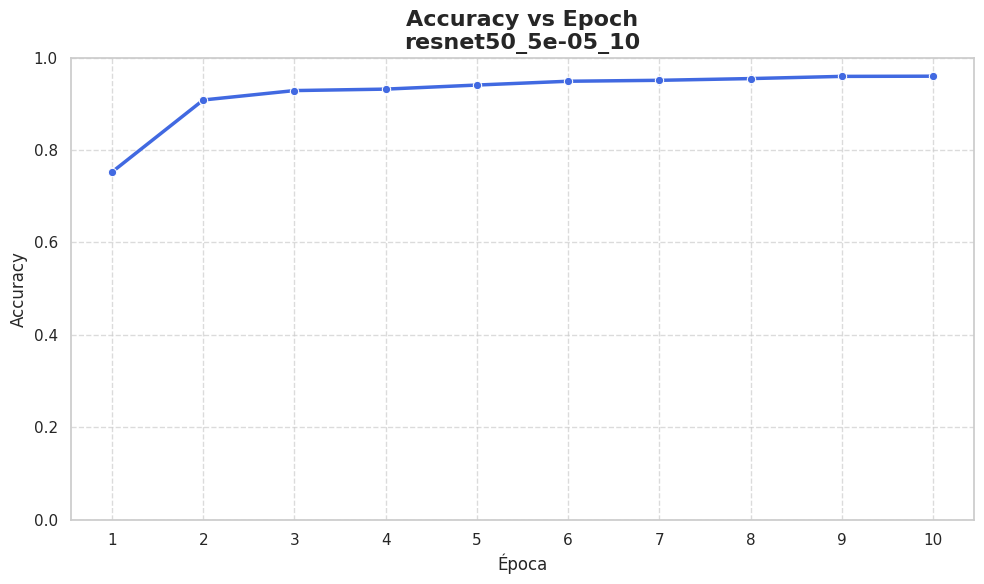

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


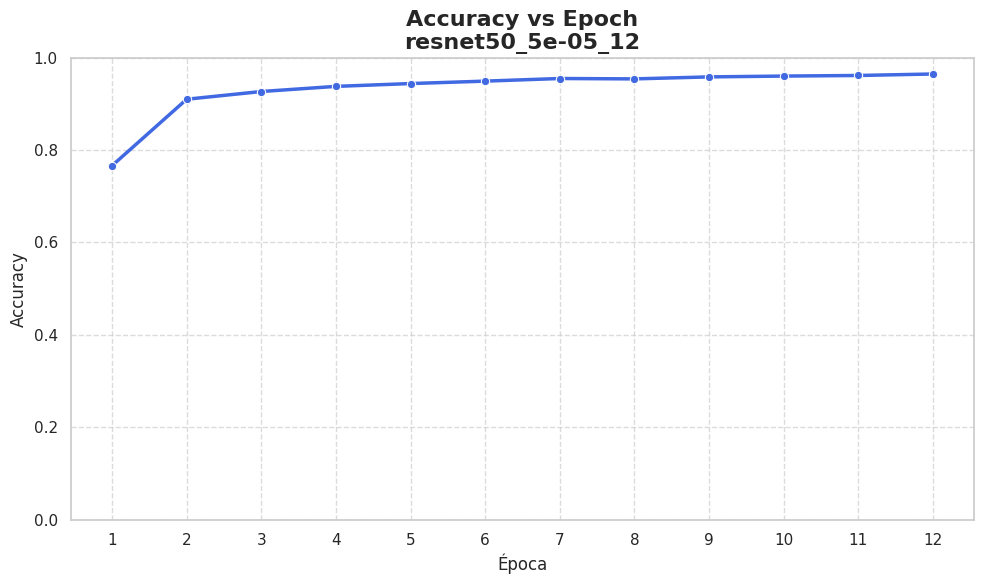

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


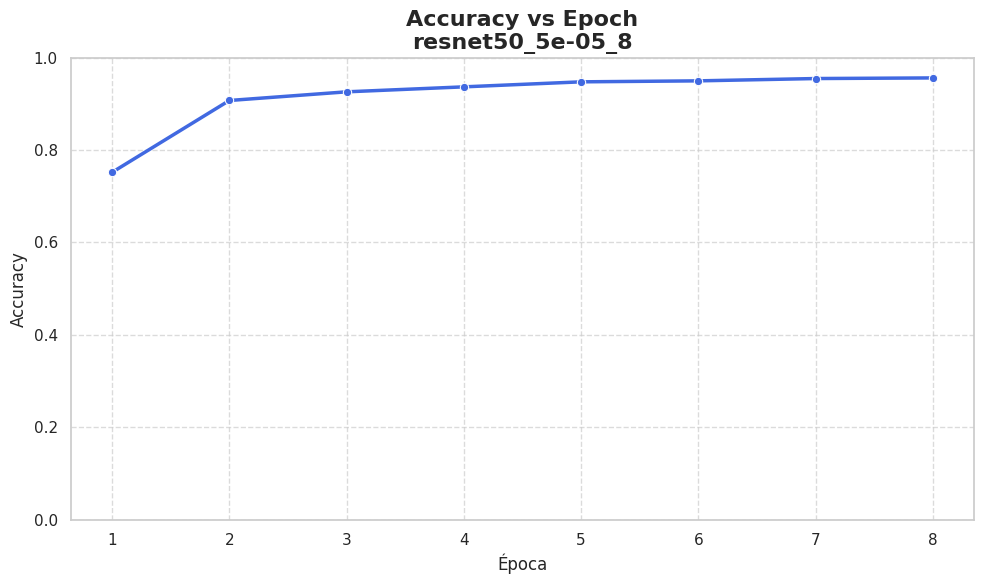

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


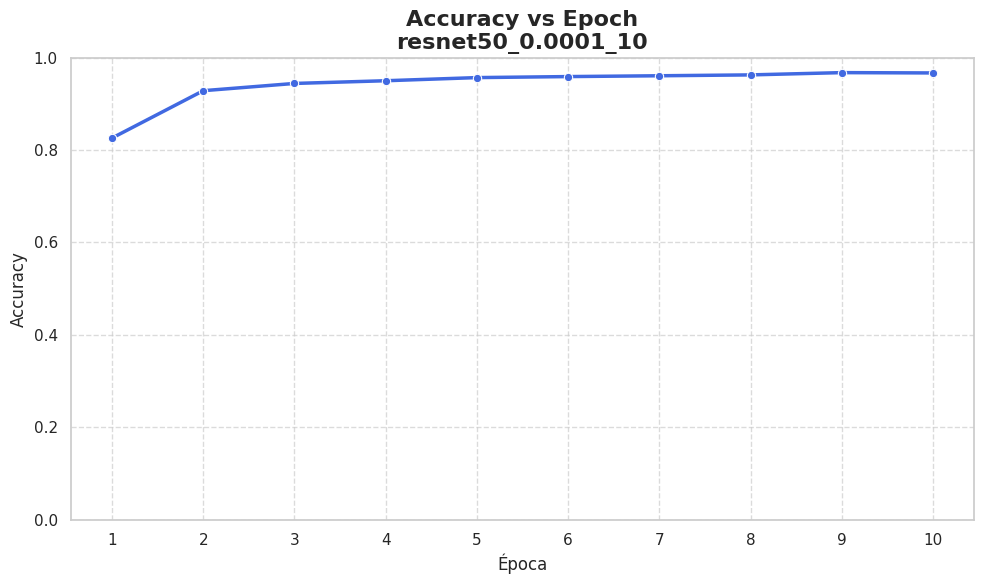

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


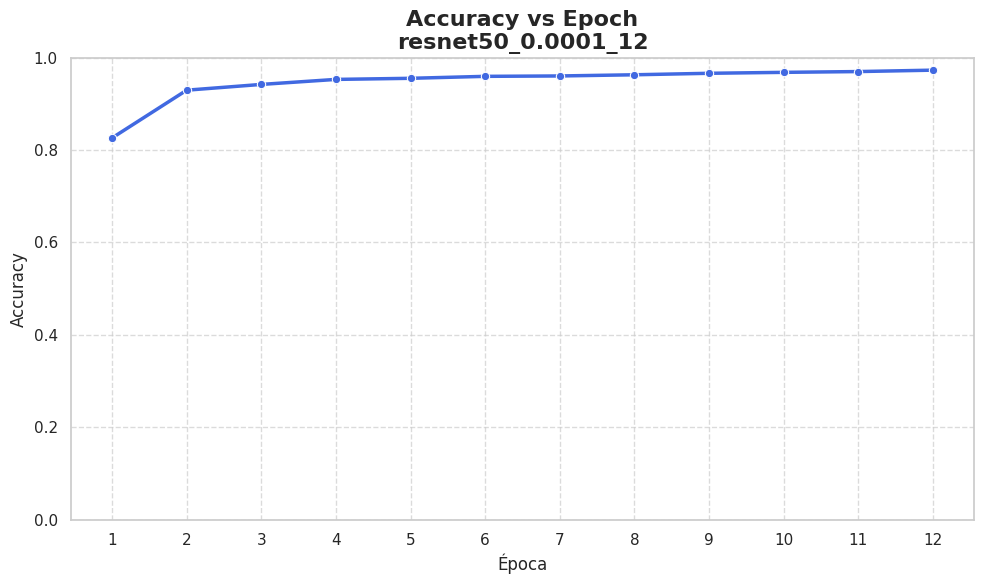

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


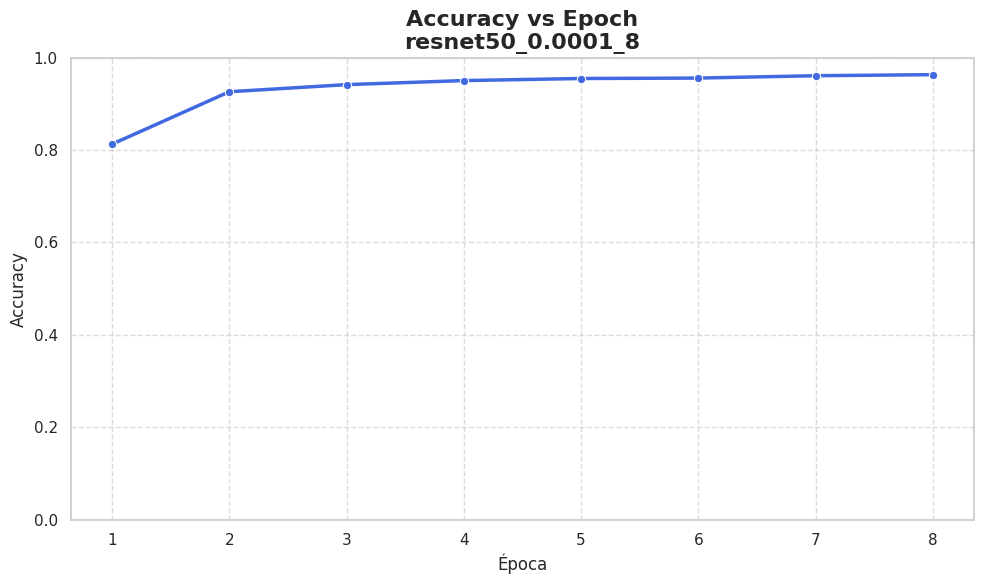

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


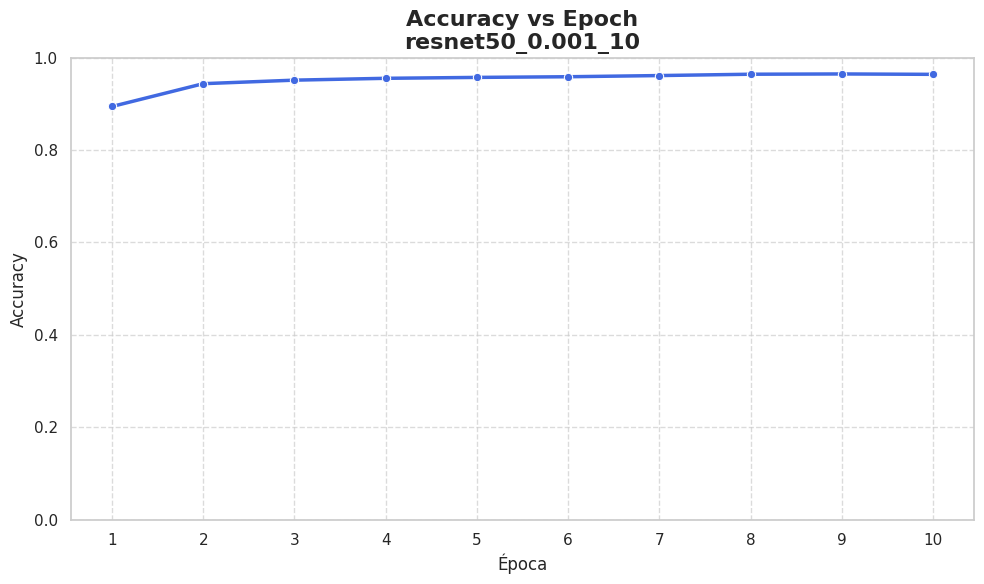

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


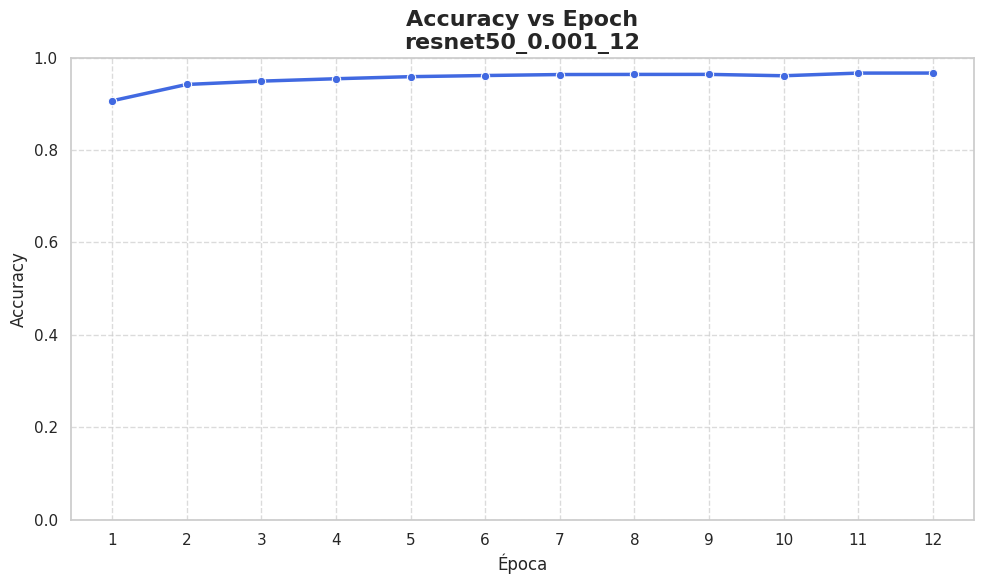

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


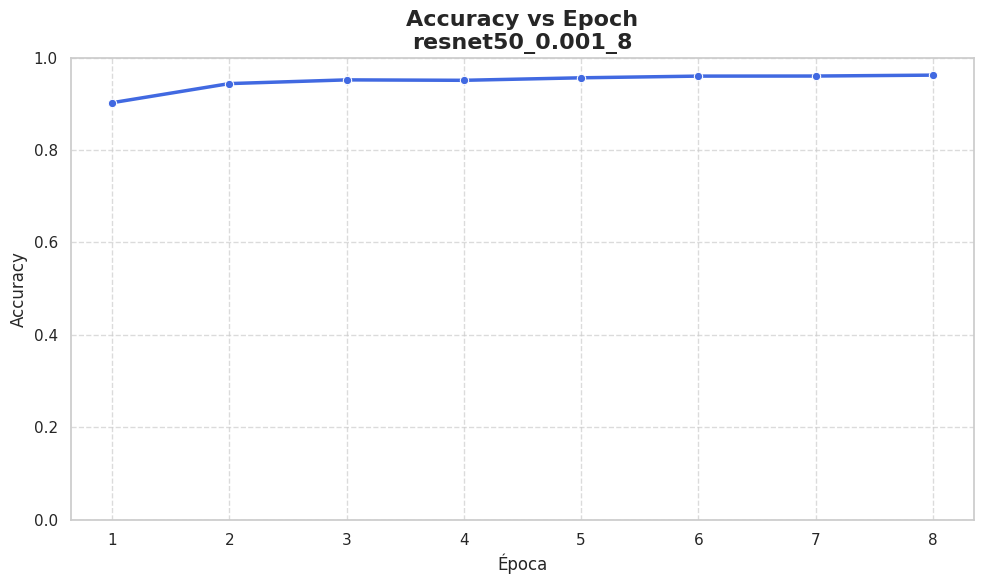

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


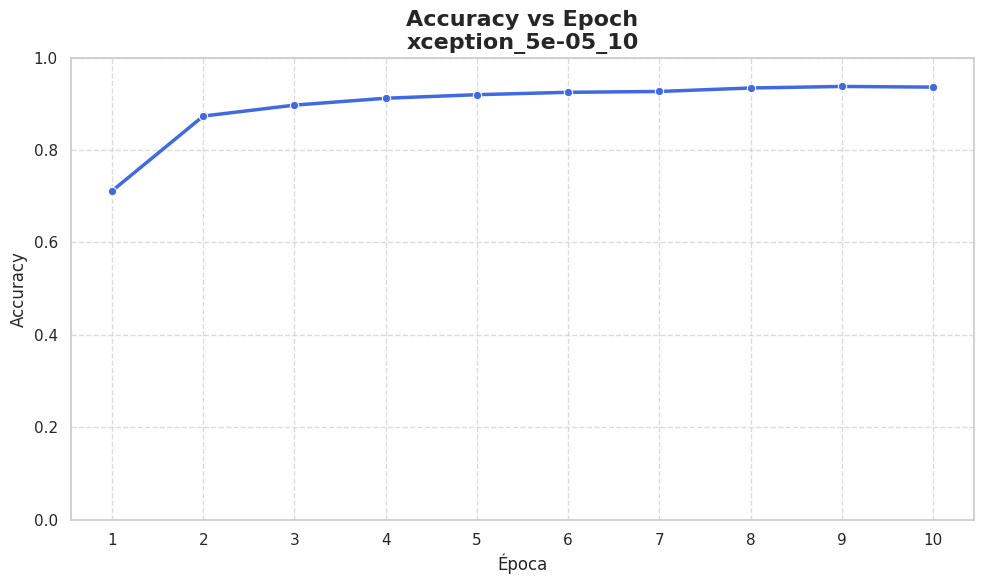

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


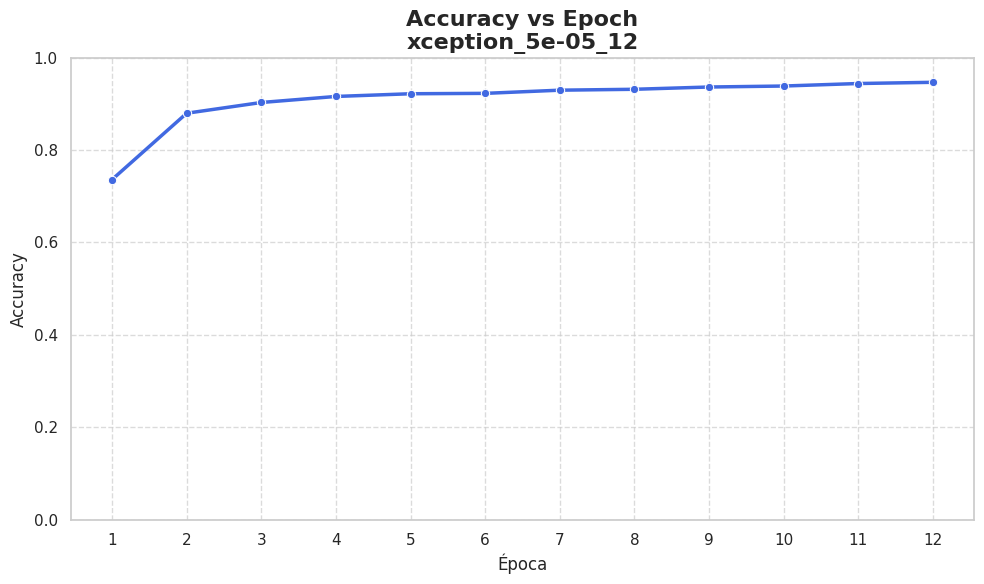

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


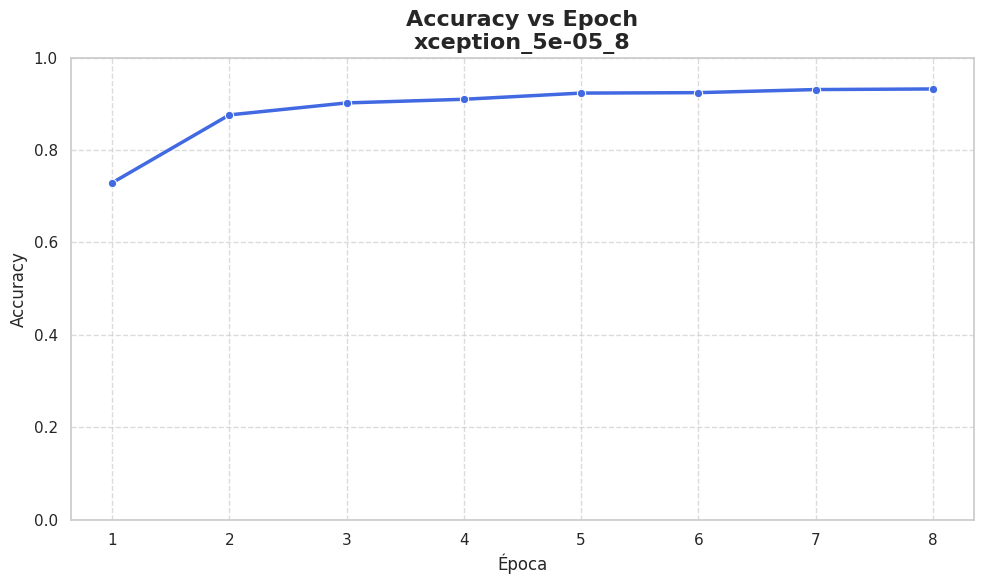

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


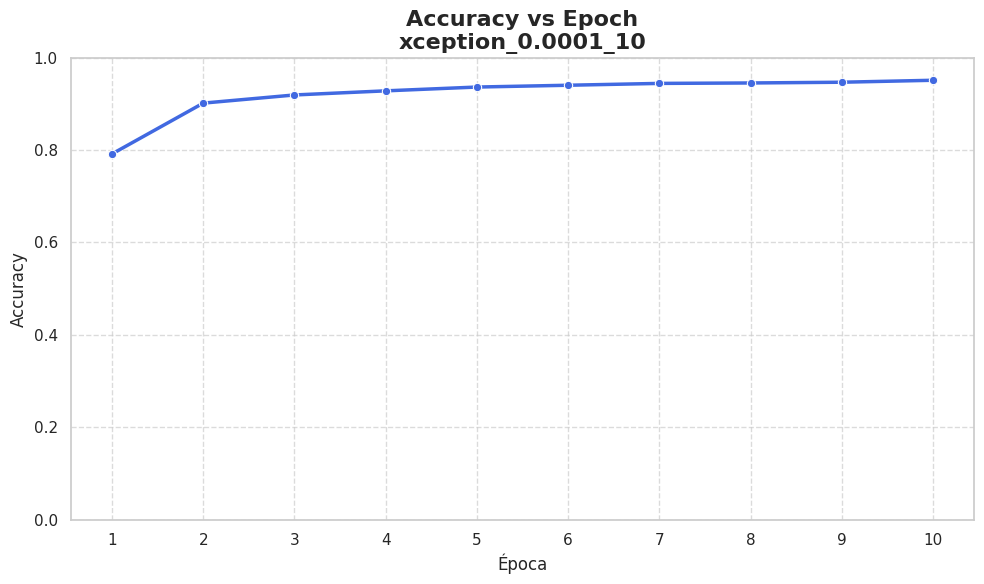

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


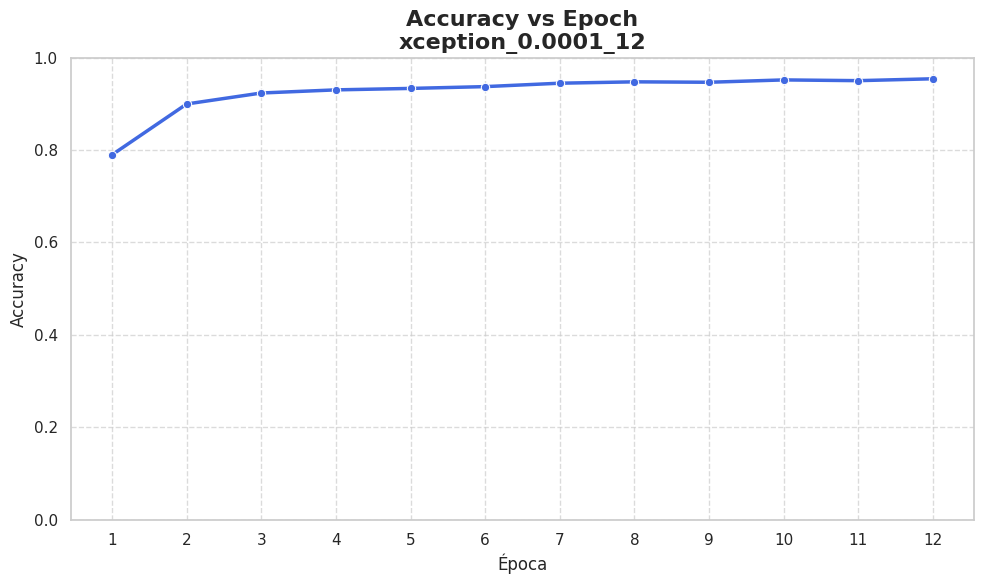

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


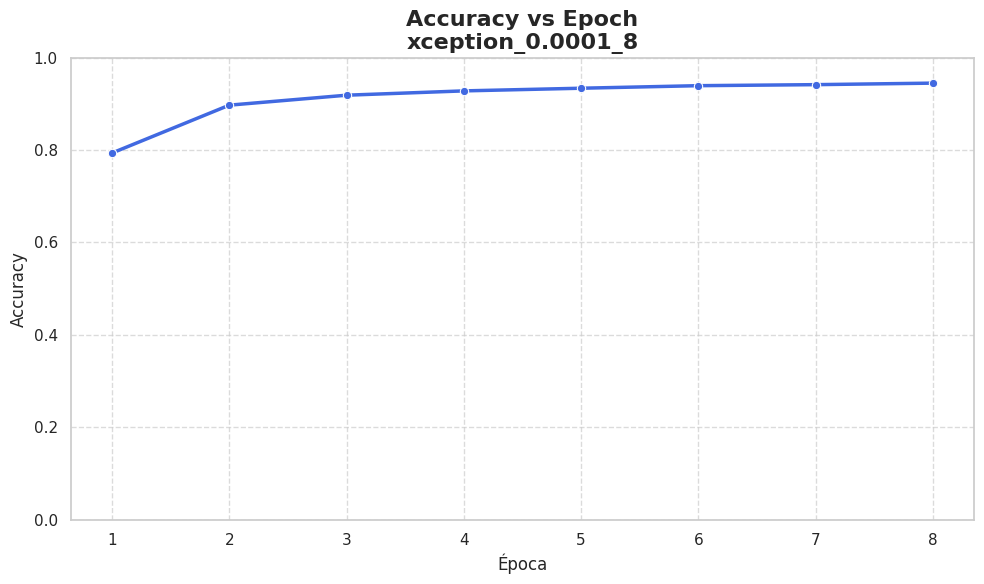

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


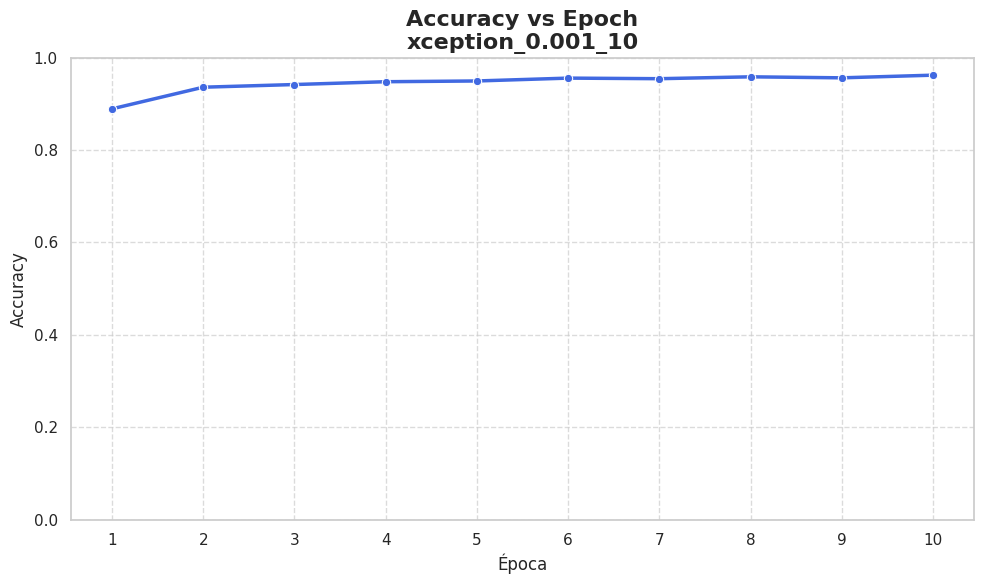

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


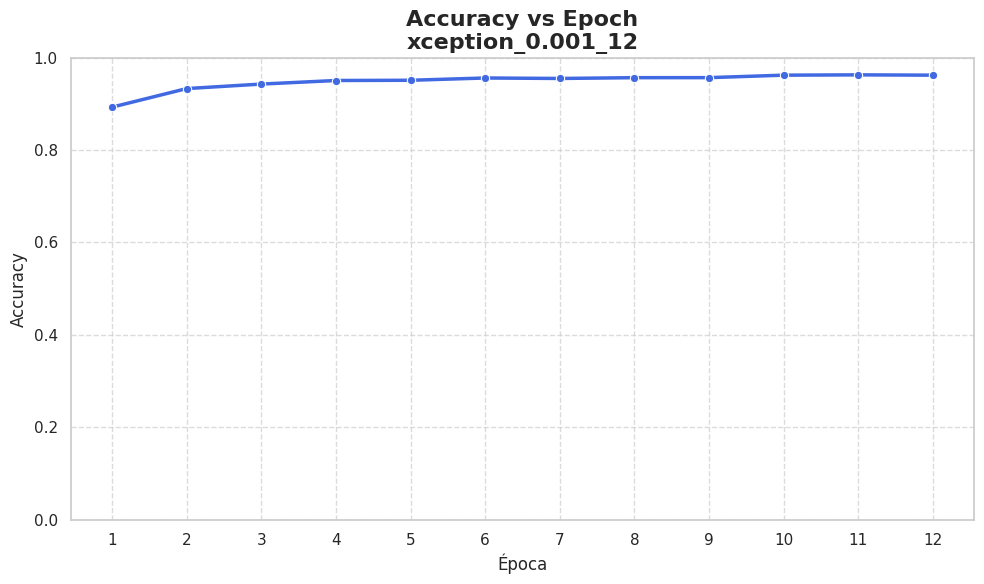

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


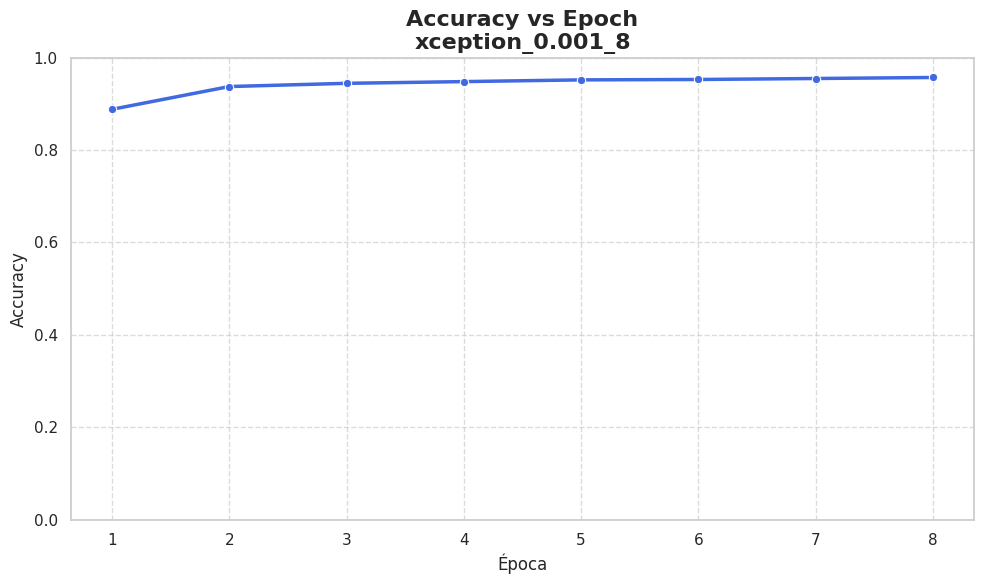

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


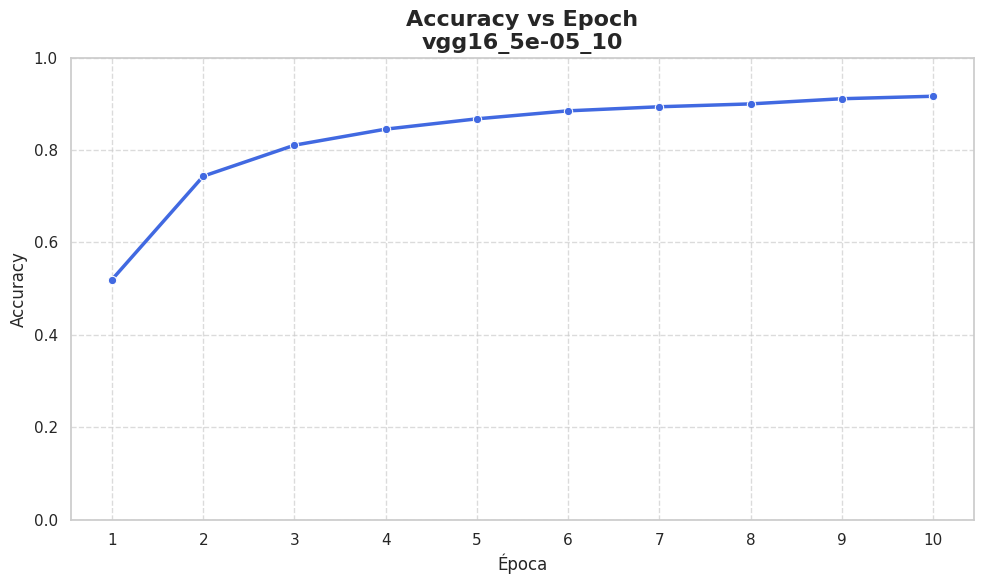

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


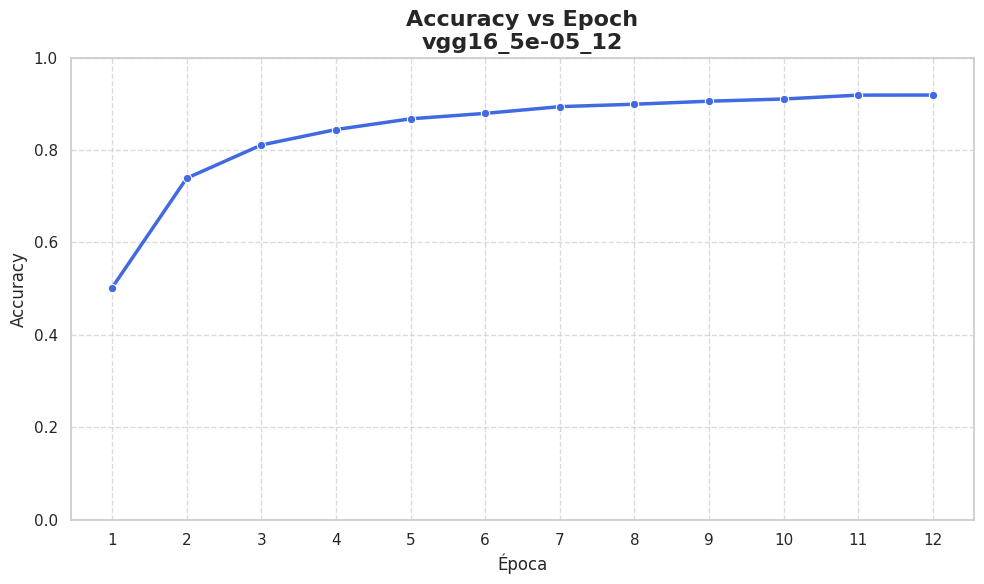

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


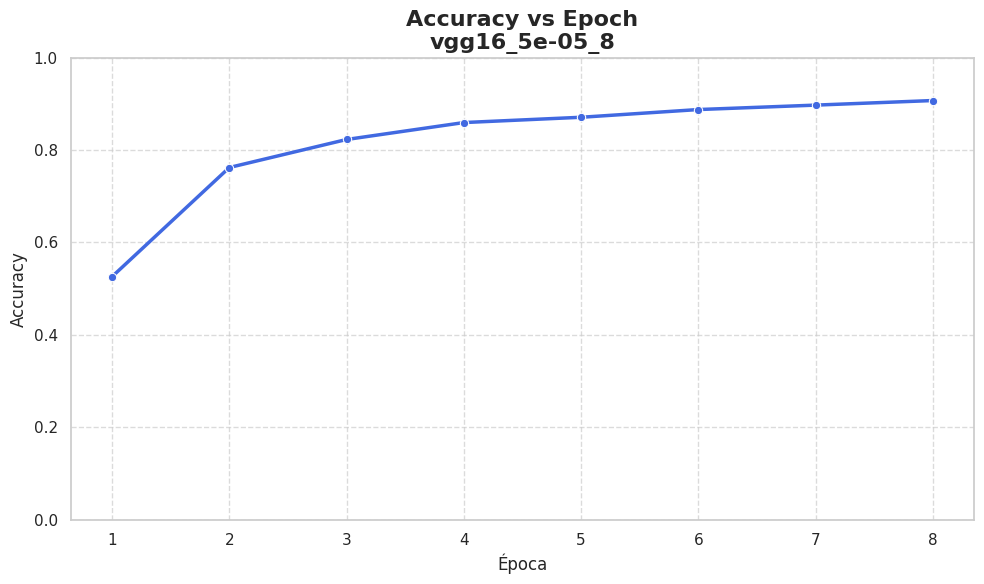

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


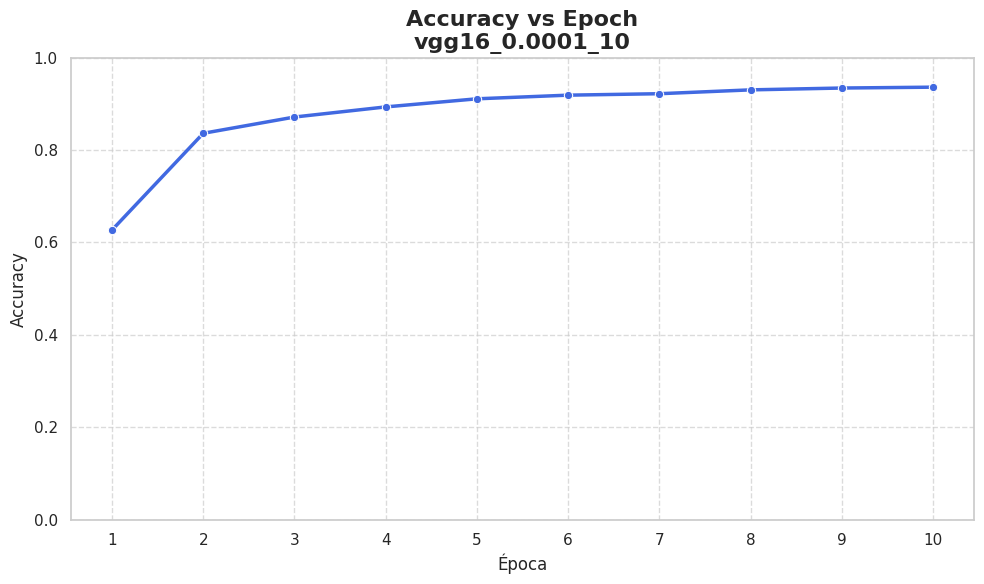

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


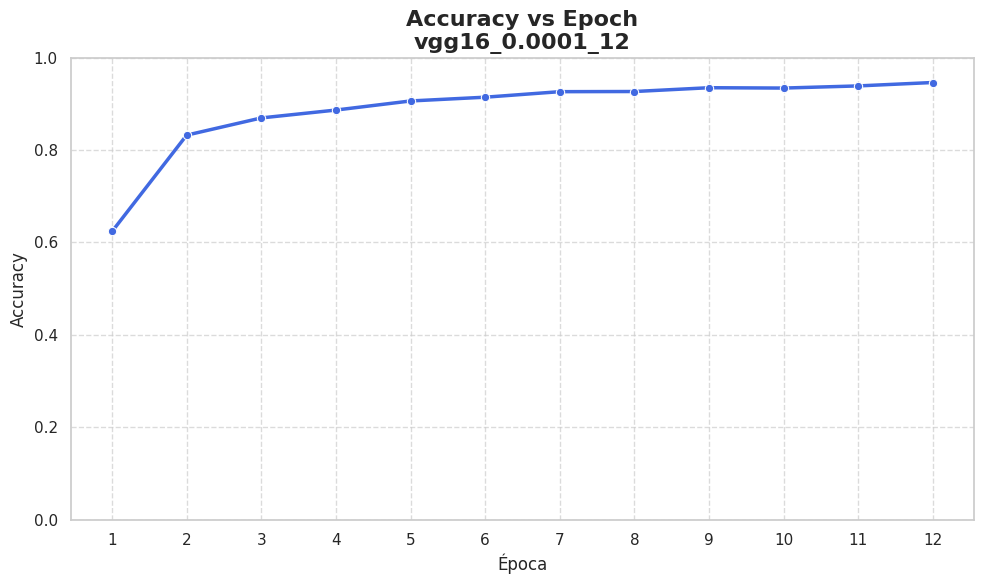

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


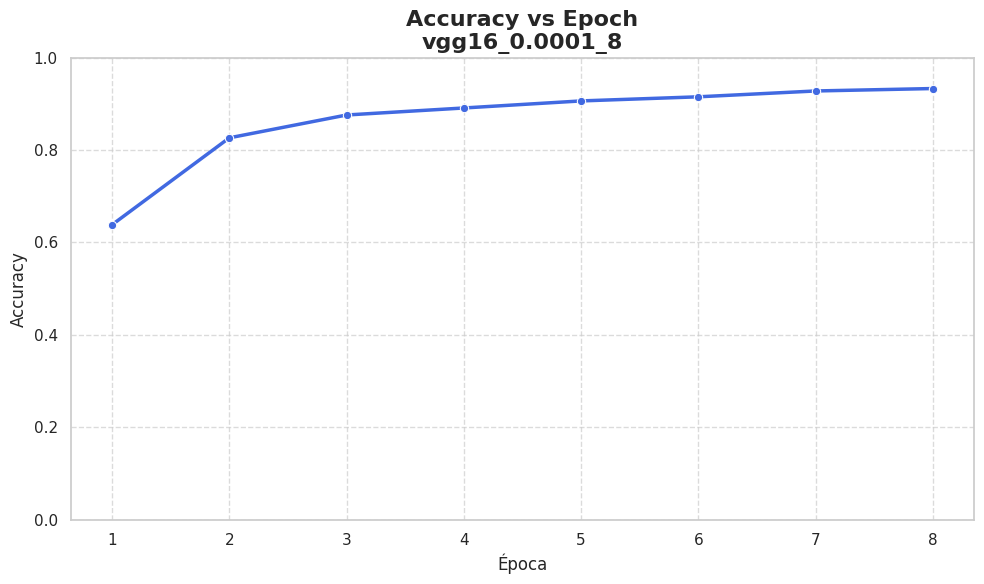

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


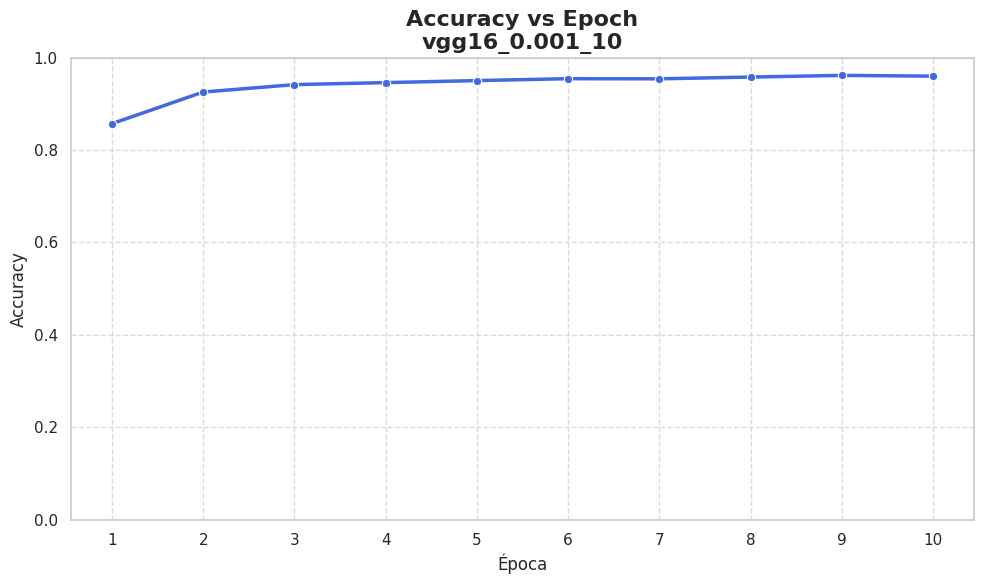

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


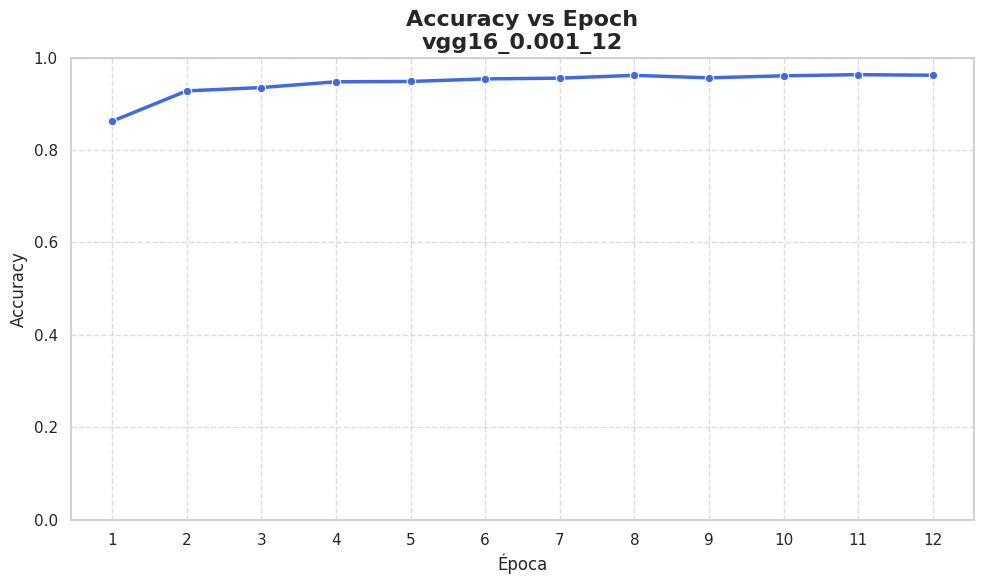

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


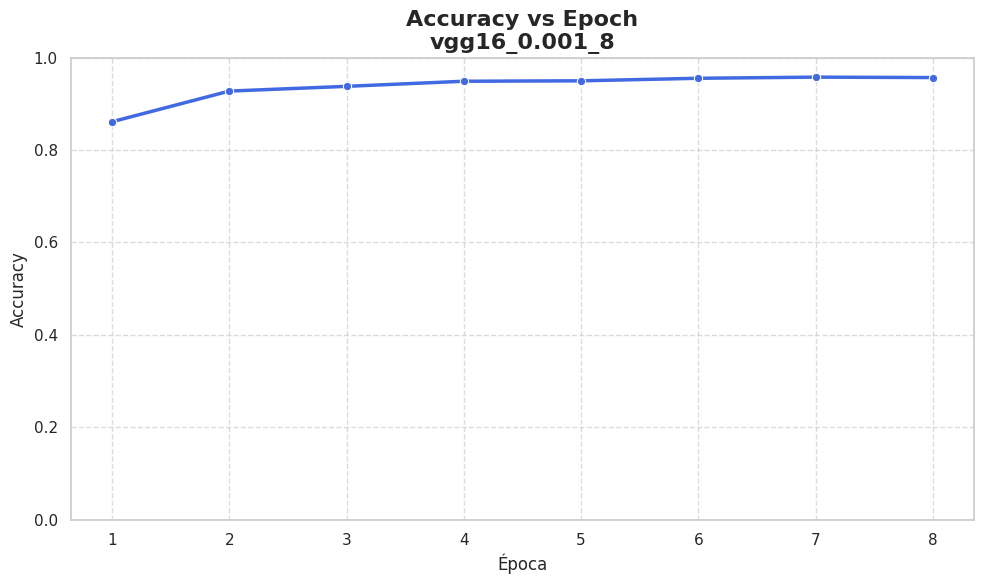

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('resultados_modelos.csv')  # Usa sep='\t' porque pegaste un TSV

# Configurar el estilo visual
sns.set(style="whitegrid", context="notebook")

# Obtener los experimentos únicos
experimentos = df['experiment'].unique()

# Crear un gráfico por cada experimento
for experimento in experimentos:
    # Filtrar datos del experimento
    df_exp = df[df['experiment'] == experimento]

    # Crear la figura
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df_exp,
        x='epoch',
        y='accuracy',
        marker='o',
        linewidth=2.5,
        color='royalblue'
    )

    # Títulos y etiquetas
    plt.title(f'Accuracy vs Epoch\n{experimento}', fontsize=16, weight='bold')
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xticks(df_exp['epoch'])  # Mostrar todas las épocas
    plt.ylim(0, 1)  # Accuracy está entre 0 y 1
    plt.grid(True, linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
